In [16]:
# first, test generative model on one dimensional graphs
import sys
sys.path.append('/Users/swu/Desktop/research/HCM/MouseHCM/HSTC')
from main import *
import seaborn as sns

In [2]:
# demonstrate the graph structure as the number of observation increases
import operator
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

plt.figure(figsize = (10,10))

def plot_chunk_graph(vertex_list, edges, location, ax=None, Print = False):
    chunks = []
    for ck in vertex_list:
        chunks.append(list(np.ravel(tuple_to_arr(ck)).astype(int)))
    if Print:
        print('chunks ', chunks)
        print('edges ', edges)
        print('location ', location)
    location[0] = [1,8]
    element_palette = {0:'#FFFFFF', 1:'#FFCAB1', 2:'#C1D7AE', 3:'#B10FBD',4:'#6C809A'}  # colorblind palette
    chunk_element_offset = {1: [0], 2: [-0.1, 0.1], 3: [-0.2, 0, 0.2], 4: [-0.3, -0.1, 0.1, 0.3],5:[-0.4, -0.2,0, 0.2, 0.4],6:[-0.6,-0.4, -0.2, 0, 0.2,0.4],7:[-0.6,-0.4, -0.2,0, 0.2, 0.4,0.6],8:[-0.8,-0.6,-0.4, -0.2,0,0.2, 0.4,0.6]}


    chunk_element_distance = 0.9
    if ax is None:
        f, ax = plt.subplots()

    chunks_by_length = defaultdict(list)
    for chunk in chunks:
        chunks_by_length[len(chunk)].append(chunk)
    max_width = max(len(v) for v in chunks_by_length.values())

    node_pos = {}
    for i in range(0,len(chunks)):
        chunk = chunks[i]
        chunk_id = chunks.index(chunk)
        chunk_len = len(chunks[chunk_id])
        n_on_level = len(chunks_by_length[chunk_len])
        id_on_level = chunks_by_length[chunk_len].index(chunk)
        xpos = location[i][0]
        ypos = location[i][1]
        node_pos[chunk_id] = (xpos, ypos)

    G = nx.MultiDiGraph()
    for node in range(len(chunks)):
        G.add_node(node, pos=node_pos[node])

    for edge in edges:
        G.add_edge(edge[0], edge[1], weight=0)

    edge_color = ['k' if weight else 'grey' for weight in nx.get_edge_attributes(G,'weight').values()]

    nx.draw_networkx(G, node_pos,
                        node_color='grey',
                        node_size=0.0001,
                        #connectionstyle='arc3, rad = 0.1',
                        arrowsize=15,
                        width=3,
                        with_labels=False,
                        edge_color=edge_color,
                        alpha = 0.3,
                        ax=ax)

    for chunk_id, chunk in enumerate(chunks):

        for element_id, element in enumerate(chunk):
            ax.scatter([node_pos[chunk_id][0] + (chunk_element_offset[len(chunk)][element_id] * chunk_element_distance)],
                        [node_pos[chunk_id][1]],
                        c=element_palette[element],
                        edgecolors = 'lightgrey',
                        linewidth=3,
                        marker='s',
                        s=600
                        #zorder=5
                        )
    plt.axis("off")
    plt.show()

    return ax

<Figure size 720x720 with 0 Axes>

# Generate a random chunking graph with specified depth $D$ and number of atomic units $n$

(((2.0,),), ((1.0,),)) (((2.0,),),) (((1.0,),),)
(((2.0,),), ((1.0,),)) (((2.0,),),) (((1.0,),),)
(((1.0,),), ((1.0,),)) (((1.0,),),) (((1.0,),),)
(((3.0,),), ((3.0,),)) (((3.0,),),) (((3.0,),),)
(((3.0,),), ((4.0,),)) (((3.0,),),) (((4.0,),),)
(((4.0,),), ((4.0,),)) (((4.0,),),) (((4.0,),),)


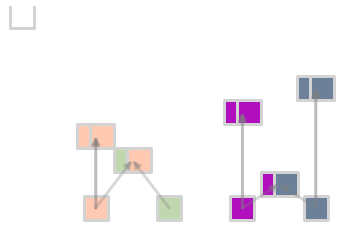

<AxesSubplot:>

In [3]:
cggt = generative_model_random_combination(D=5, n=5)
cggt = to_chunking_graph(cggt)
plot_chunk_graph(cggt.vertex_list,cggt.edge_list, cggt.vertex_location)


/Users/swu/Desktop/research/HCM/MouseHCM/HSTC/Generative_Model.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_sample = np.random.choice(list(marginals.keys()), p = list(marginals.values()))
/Users/swu/Desktop/research/HCM/MouseHCM/HSTC/Generative_Model.py:199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_sample = np.random.choice(list(marginals.keys()), p = list(marginals.values()))


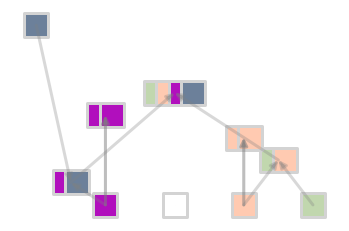

<AxesSubplot:>

In [4]:
n = 1000
seq = generate_random_hierarchical_sequence(cggt.M,s_length = 5000)
learned_M, _, _,_ = partition_seq_hastily(seq, list(cggt.M.keys()))
cg = Chunking_Graph(DT = 0, theta=1)
cg = rational_chunking_all_info(seq, cg) 
plot_chunk_graph(cg.vertex_list,cg.edge_list, cg.vertex_location)

# Dynamical Hyerarchical Chunking Graph Building Demonstration 

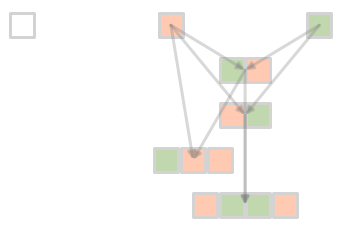

<AxesSubplot:>

In [5]:
vertex_list = [[0],[1],[2],[2,1],[1,2],[2,1,1],[1,2,2,1],[2,1,1,1,2,2,1]]
edge_list = [(1,3),(2,3),(1,4),(2,4),(3,5),(1,5),(3,6),(4,6),(5,7),(6,7)]
vertex_location = [[1,8],[2,8],[3,8],[2.5,7],[2.5,6],[2.15,5],[2.5,4],[2.325,3]]
plot_chunk_graph(vertex_list[0:7],edge_list[0:8], vertex_location[0:7])



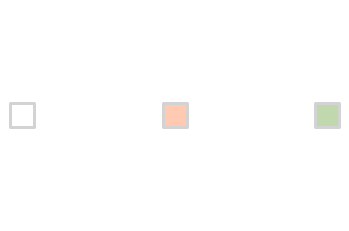

<AxesSubplot:>

In [6]:
plot_chunk_graph(vertex_list[0:3],[], vertex_location[0:3])

In [10]:
cg_gt = hierarchy1d()
SUM_probs = np.sum(list(cg_gt.M.values()))
for item in list(cg_gt.M.keys()):
    cg_gt.M[item] = cg_gt.M[item]/SUM_probs

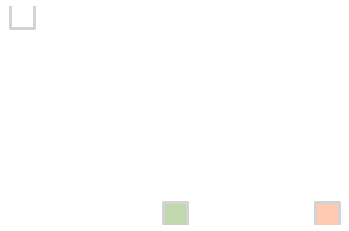

<AxesSubplot:>

In [12]:
cg = Chunking_Graph(DT = 0, theta=1)# initialize chunking part with specified parameters

seq = generate_hierarchical_sequence(cg_gt.M, s_length=10)
cg = learn_stc_classes(seq, cg)
plot_chunk_graph(cg.vertex_list,cg.edge_list, cg.vertex_location)

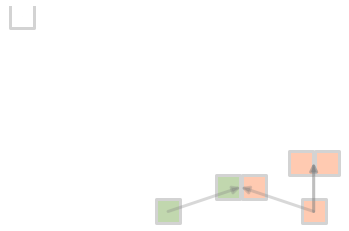

<AxesSubplot:>

In [13]:
seq = generate_hierarchical_sequence(cg_gt.M, s_length=20)
cg = learn_stc_classes(seq, cg)
plot_chunk_graph(cg.vertex_list,cg.edge_list, cg.vertex_location

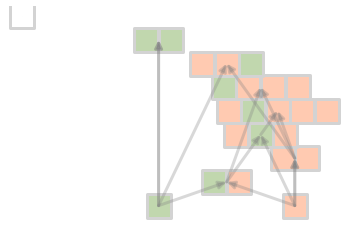

<AxesSubplot:>

In [15]:
seq = generate_hierarchical_sequence(cg_gt.M, s_length=80)
cg = learn_stc_classes(seq, cg)
plot_chunk_graph(cg.vertex_list,cg.edge_list, cg.vertex_location)